In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
AbDF = pd.read_csv('abalone.csv')

In [3]:
AbDF.shape

(4177, 9)

In [4]:
AbDF

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


##### Amongst feature columns, data in 'Sex' is categorical in nature and 'length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight' data are continuous in nature while target / label 'Rings' data type indicates that dependent variable data is discrete in nature.

#### Getting the basic summary and statistical information of the data.

In [8]:
AbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
AbDF.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
AbDF.nunique() #Checking for unique elements in each of the columns

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

### Dataframe Description:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.
Attribute Information:
    
Sex: M, F, and I (infant)
    
Length(mm) : Longest shell measurement
    
Diameter(mm): perpendicular to length

Height(mm): with meat in shell

Whole weight(grams): whole abalone

Shucked weight(grams):  weight of meat

Viscera weight(grams):  gut weight (after bleeding)

Shell weight(grams): after being dried

Rings: +1.5 gives the age in years. 

#### Checking for null / values missing

In [11]:
AbDF.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#### There are no values missing from dataset

#### Checking for 0 values in dataset

In [12]:
(AbDF==0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

'Height' Column has two 0 values

### Interpreting Relationship between Dependent and Independent Variables

In [13]:
X = AbDF.drop(columns = ['Rings'])
y = AbDF['Rings']

#### Analyzing the Target Variable

In [14]:
AbDF['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [15]:
AbDF['Rings'].nunique()

28

#### There are 28 Ring Count values in the Label column / target variable.

In [16]:
AbDF['Rings'].value_counts() #number of values in each of the 28 categories

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Rings of the Abalones range from 1 to 29 in number.

<AxesSubplot:xlabel='Rings', ylabel='count'>

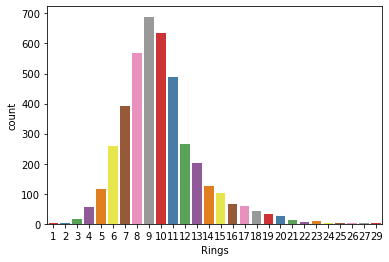

In [17]:
sns.countplot(AbDF['Rings'], palette="Set1")

#### It is observed that the distribution is right skewed, with the majority of values falling in the region between'6' and '12' and then the rest of the values tailing off from '13' to '29'. 

#### The Data in Target / Label column is Discrete in nature since the count of 'Rings' ranges from 1 - 29 and The age of an Abalone will be determined by adding 1.5 to number of rings.

### Visualing the Categorical Data in column 'Sex'

In [18]:
AbDF['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

There are 3 categories in 'Sex' column: 'M' for male,'F' for female,'I' for infant.

In [19]:
AbDF['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

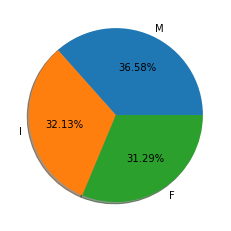

In [20]:
labels = 'M','I','F'
fig, ax = plt.subplots()
ax.pie(AbDF['Sex'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Share of values:

    M : 36.58%
    
    F : 31.29%
    
    I : 32.13%

### Encoding the above categorical data using get_dummies().

In [21]:
dumm = pd.get_dummies(AbDF['Sex'],drop_first = False)

In [22]:
dumm

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [23]:
AbDF = AbDF.join(dumm)

In [24]:
AbDF.drop(columns = ['Sex'],axis = 1, inplace = True)

In [25]:
AbDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


### Finding Correlation 

In [26]:
a_corr = AbDF.corr()
a_corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


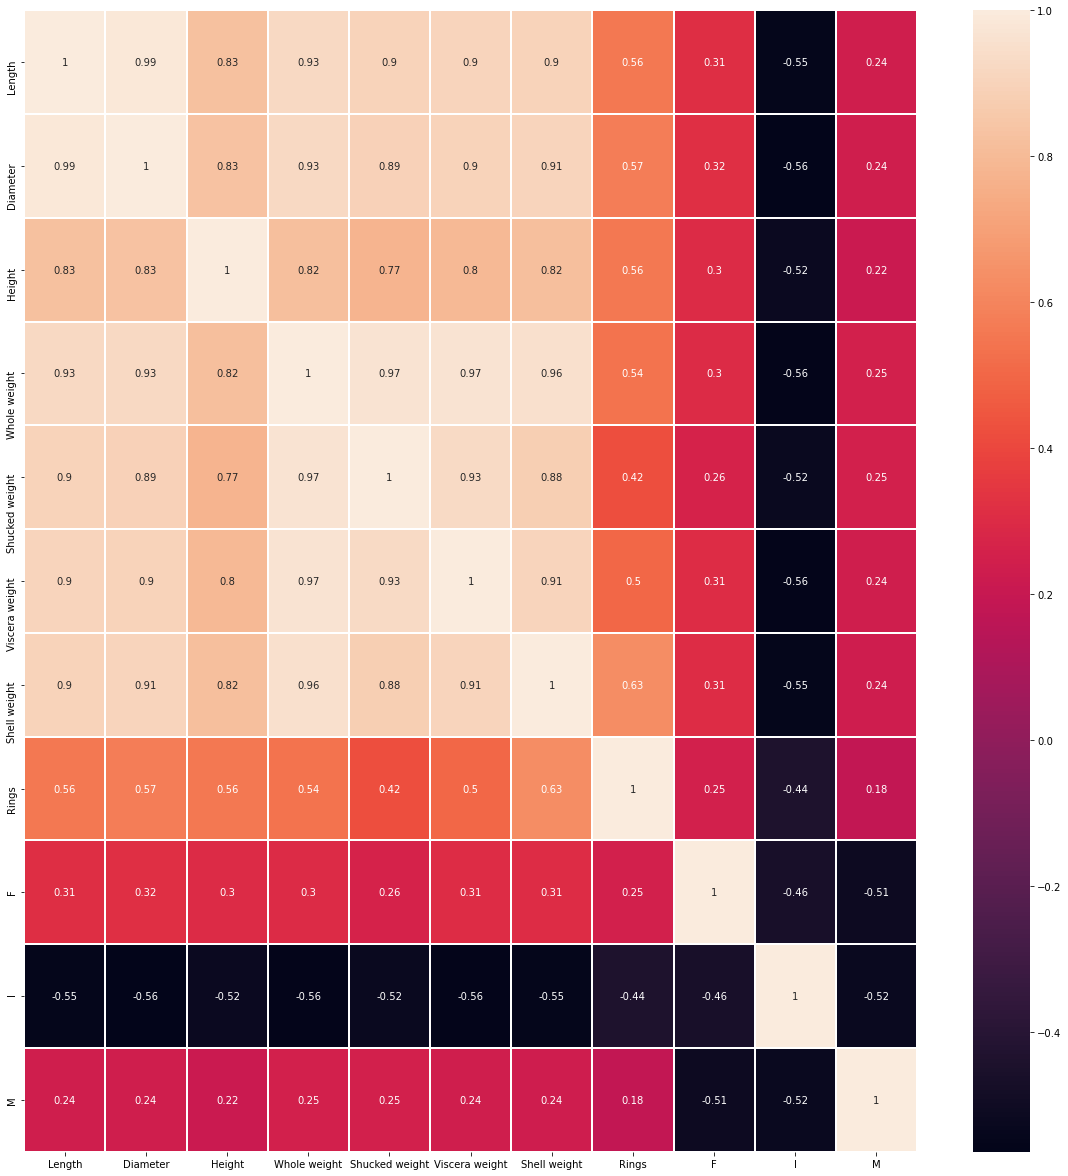

In [27]:
plt.figure(figsize=(20,21))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

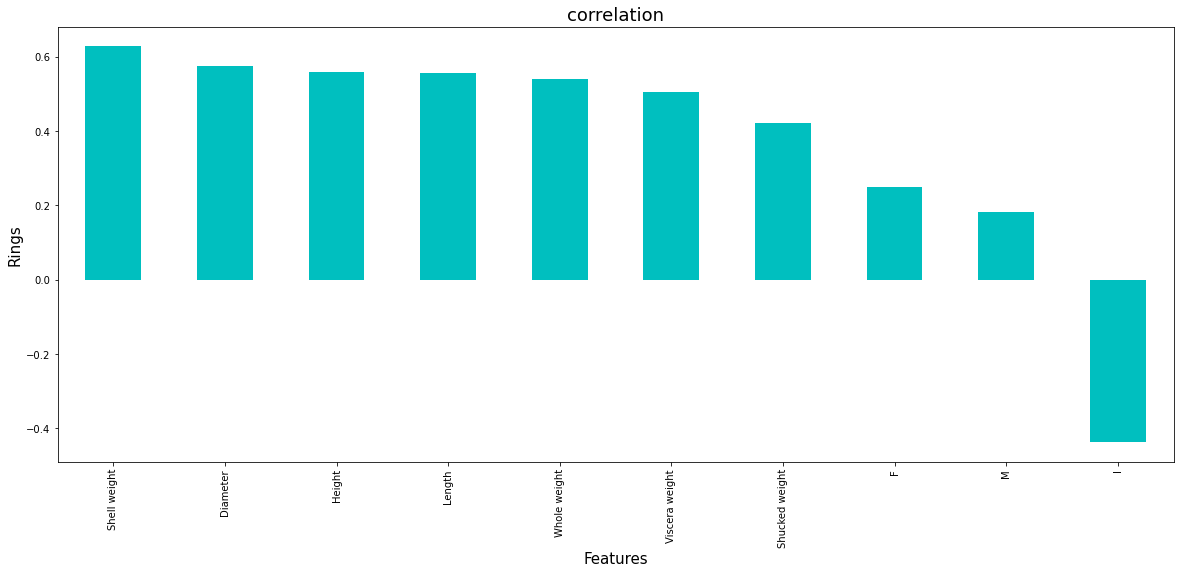

In [28]:
plt.figure(figsize = (20,8))
AbDF.corr()['Rings'].sort_values(ascending = False).drop(['Rings']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Rings',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Attributes like 'Shell weight', 'Diameter','Height','Length','Whole weight', 'Viscera weight' and 'Shucked weight' show a good positive correlation with Ring count. In 'Sex', 'I'(infants) show a strong negative correlation with ring count which might imply that the younger the abalone the lesser the rings.

### Interpreting Relationship between Dependent Variable and Independent Variables

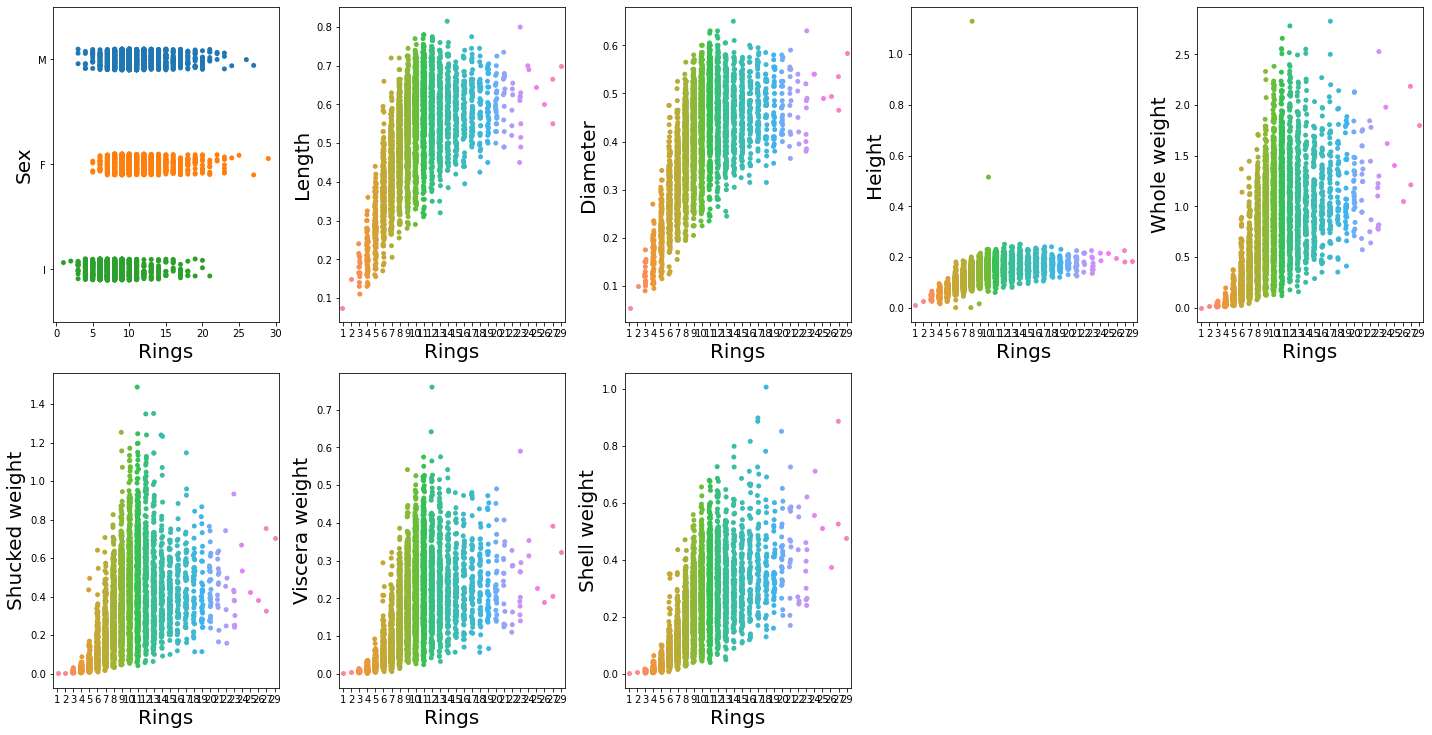

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = AbDF['Rings']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

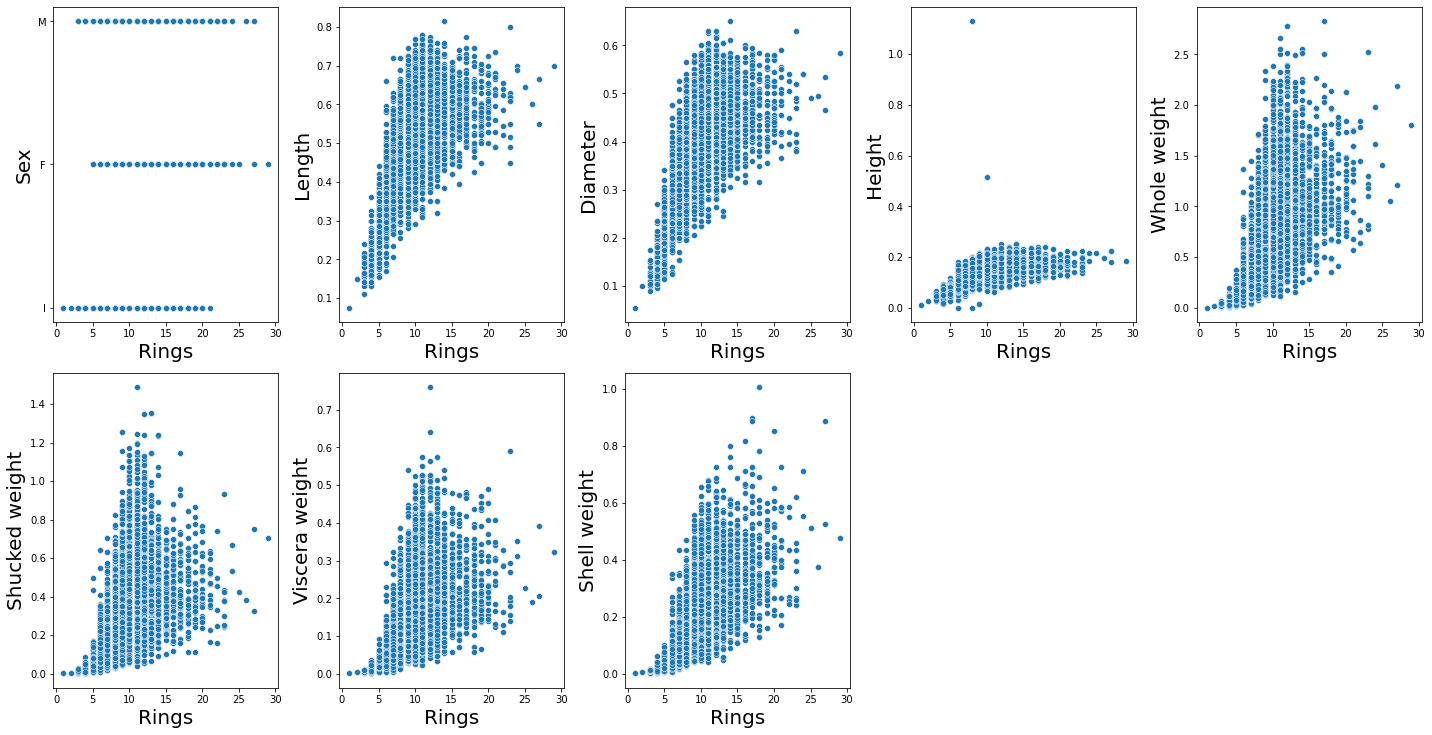

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = AbDF['Rings']
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(y,X[col])
        plt.xlabel('Rings',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

From the above graphs it is observed that infants have rings ranging from 0 to 21 while Male and female have rings ranging from 5 t0 29. This may imply a negative correlation between infants and number of rings. Length, Diameter and the different weight attributes show an almost linear relationship with the number of rings. The presence of outliers can also be seen in all the features.

### Checking for Skewness and presence of Outliers in Feature Data

In [31]:
X = AbDF.drop(columns = ['Rings'])
y = AbDF['Rings']

In [32]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [33]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [34]:
X.drop(columns = ['F','I','M'],axis=1).skew() 
#ignoring the values in categorical columns('F','I','M') since their skewness can't be checked.

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

#### Visualising Data Distribution for every column

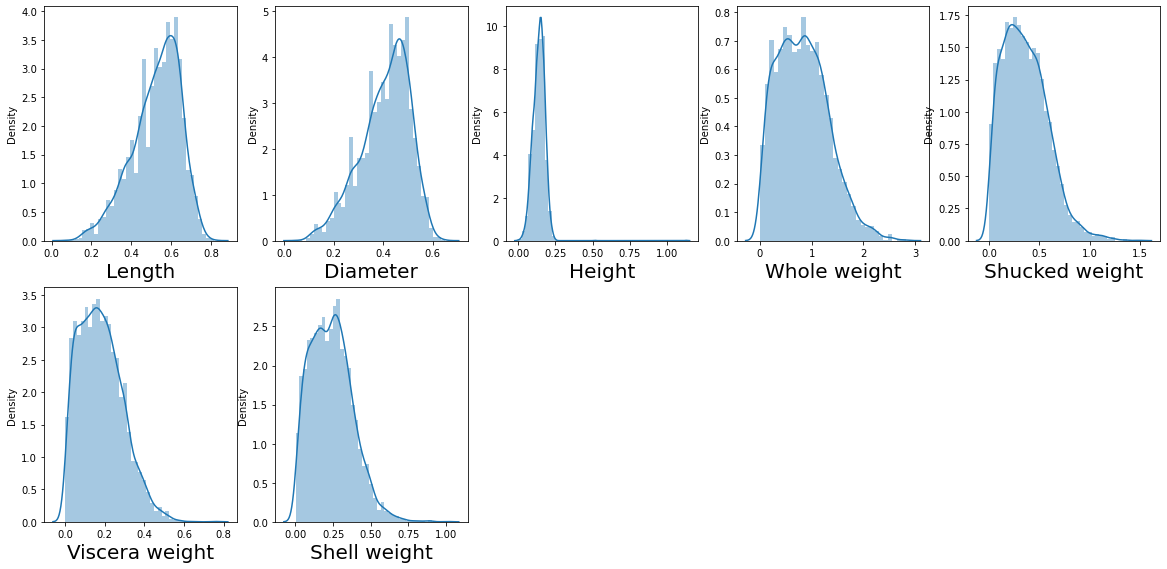

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['F','I','M'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There is considerable skewness in the data distribution in all feature columns.

### Checking for Outliers

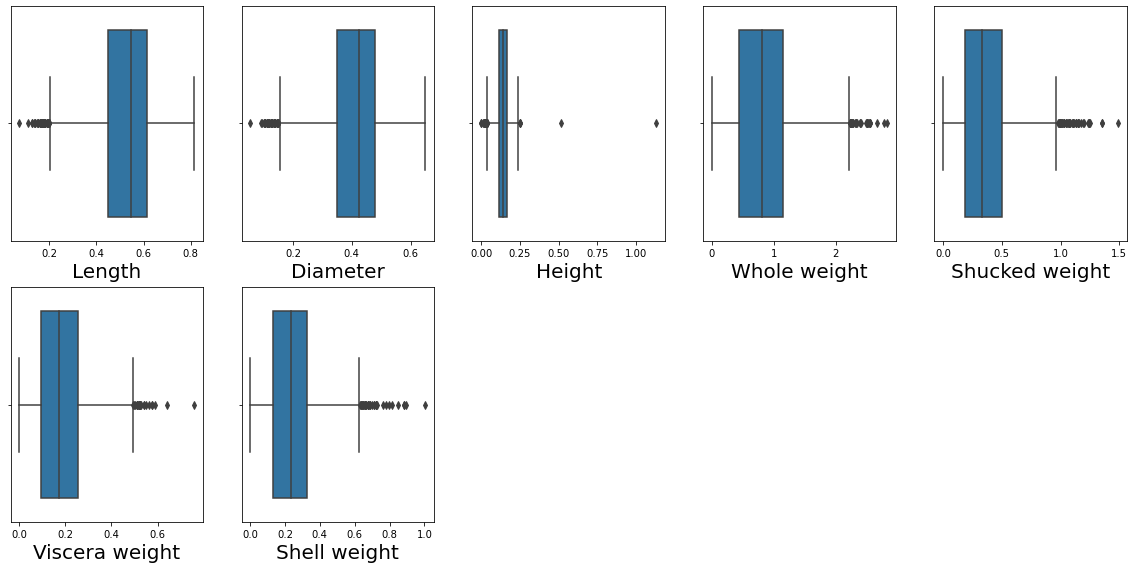

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X.drop(columns = ['F','I','M'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

From the Boxplots it is evident that all features have outliers present.

#### Removing Outliers using Z score Method

In [37]:
df2 =X.drop(columns = ['F','I','M'],axis=1).copy()
#ignoring the values in categorical columns('F','I','M') since they can't have outliers.

In [38]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [39]:
df3.shape

(4084, 7)

In [40]:
df2.shape

(4177, 7)

##### Data loss %:

In [41]:
loss=(4177-4084)/4177 * 100
loss

2.2264783337323437

2.22% Data loss is within acceptable range

In [42]:
df3

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [43]:
dropindx = X.index.difference(df3.index)

In [44]:
dropindx

Int64Index([  81,  129,  163,  164,  165,  166,  168,  170,  236,  237,  238,
             239,  277,  334,  358,  526,  694,  696,  719,  720,  891, 1048,
            1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1207, 1209, 1257,
            1417, 1418, 1422, 1426, 1427, 1428, 1429, 1528, 1754, 1756, 1757,
            1759, 1761, 1762, 1763, 1821, 1982, 1986, 1987, 2051, 2090, 2108,
            2114, 2157, 2161, 2208, 2274, 2334, 2368, 2381, 2544, 2623, 2624,
            2625, 2709, 2710, 2810, 2811, 2862, 2863, 3007, 3008, 3148, 3149,
            3151, 3188, 3427, 3599, 3628, 3713, 3715, 3800, 3837, 3899, 3902,
            3961, 3962, 3996, 4145, 4148],
           dtype='int64')

In [45]:
AbDF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [46]:
AbDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


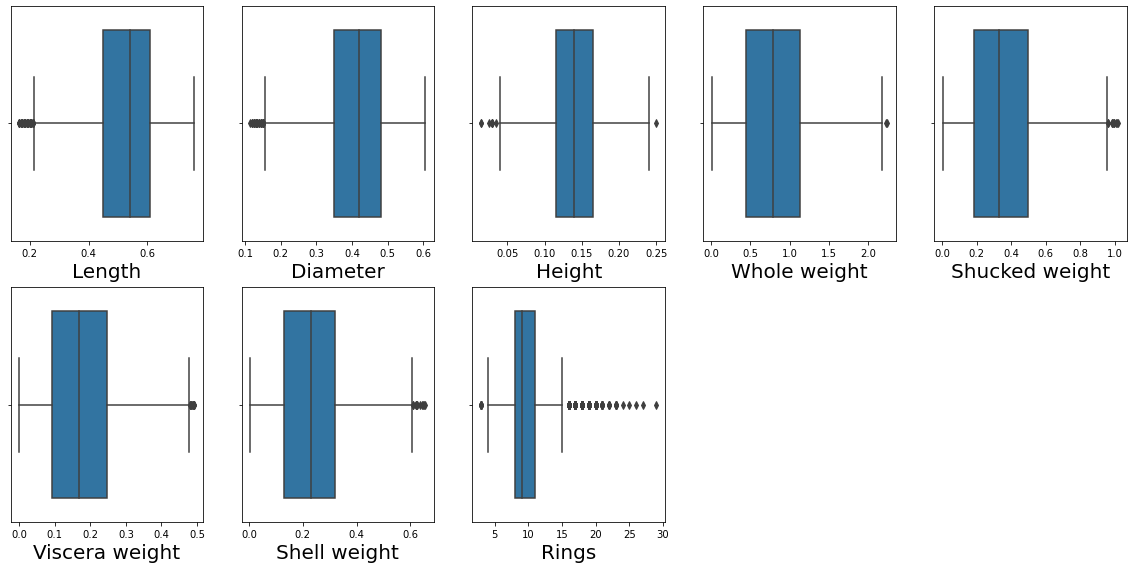

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in AbDF.drop(columns = ['F','I','M'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(AbDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.

In [48]:
AbDF.drop

<bound method DataFrame.drop of       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      S

In [49]:
AbDF.drop(columns = ['F','I','M','Rings']).skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

'Length' and 'Diameter' are still skewed.

### Reducing the skewness further 


In [50]:
feat = ['Length', 'Diameter']
SkewedDF = AbDF[feat].copy()

In [51]:
SkewedDF

,Length,Diameter
0,0.455,0.365
1,0.350,0.265
2,0.530,0.420
3,0.440,0.365
4,0.330,0.255
...,...,...
4172,0.565,0.450
4173,0.590,0.440
4174,0.600,0.475
4175,0.625,0.485


#### Trying PowerTransformer method

In [52]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [53]:
transformed= powtrans.fit_transform(SkewedDF)

In [54]:
type(transformed)

numpy.ndarray

In [55]:
transformed = pd.DataFrame(transformed, columns=SkewedDF.columns) #to convert numpy array back into dataframe

In [56]:
transformed.skew()

Length     -0.084034
Diameter   -0.080768
dtype: float64

In [57]:
SkewedDF.skew()

Length     -0.633786
Diameter   -0.605450
dtype: float64

In [58]:
AbDF.reset_index(drop=True, inplace=True)

In [59]:
transformed.index = AbDF.index

In [60]:
AbDF[feat] = transformed[feat]

In [61]:
AbDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,-0.696161,-0.554594,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,-1.420433,-1.409424,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,-0.058200,0.025024,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,-0.811094,-0.554594,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,-1.538442,-1.482282,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4079,0.278101,0.378060,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4080,0.534430,0.257350,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4081,0.640858,0.693557,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4082,0.916960,0.825397,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [62]:
AbDF.drop(columns = ['F','I','M','Rings']).skew()

Length           -0.084034
Diameter         -0.080768
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
dtype: float64

In [63]:
X = AbDF.drop(columns = ['Rings'])
y = AbDF['Rings']

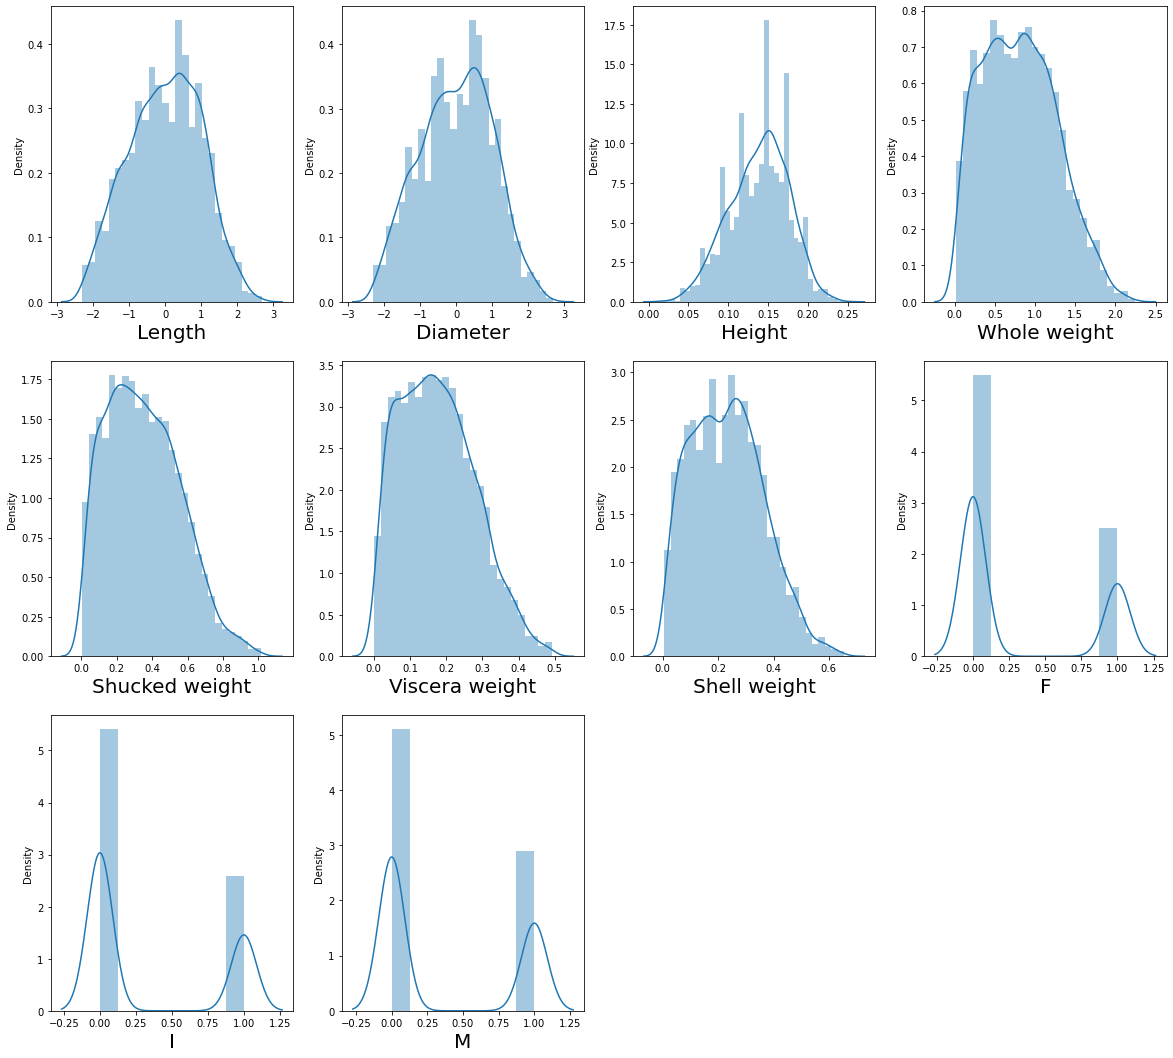

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X:
    if plotnum<=11:
        plt.subplot(4,4,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Distributions look much more Normalised now

In [65]:
(X==0).sum() #checking if any of the features with continuous data type have 0 values.

Length               0
Diameter             0
Height               0
Whole weight         0
Shucked weight       0
Viscera weight       0
Shell weight         0
F                 2807
I                 2759
M                 2602
dtype: int64

There are no 0 values in the features with continuous data type.

### Feature Selection

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [68]:
scaled_X

array([[-0.69616075, -0.55459434, -1.17659224, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [-1.42043347, -1.40942442, -1.31174068, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [-0.05819969,  0.02502394, -0.09540474, ...,  1.48260601,
        -0.69299817, -0.75469323],
       ...,
       [ 0.6408576 ,  0.69355676,  1.79667339, ..., -0.67448802,
        -0.69299817,  1.32504169],
       [ 0.91696004,  0.82539728,  0.31004058, ...,  1.48260601,
        -0.69299817, -0.75469323],
       [ 1.96945388,  1.84446429,  1.52637652, ..., -0.67448802,
        -0.69299817,  1.32504169]])

In [69]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
mmscaled_X = m.fit_transform(X)
mmscaled_X

array([[0.32319352, 0.35029116, 0.34042553, ..., 0.        , 0.        ,
        1.        ],
       [0.17788028, 0.17877945, 0.31914894, ..., 0.        , 0.        ,
        1.        ],
       [0.45118977, 0.46658483, 0.5106383 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.59144395, 0.60071816, 0.80851064, ..., 0.        , 0.        ,
        1.        ],
       [0.6468393 , 0.62717043, 0.57446809, ..., 1.        , 0.        ,
        0.        ],
       [0.85800464, 0.83163437, 0.76595745, ..., 0.        , 0.        ,
        1.        ]])

In [72]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4079    11
4080    10
4081     9
4082    10
4083    12
Name: Rings, Length: 4084, dtype: int64

### Adding value 1.5 to every element of target column 'Rings' so as to get the age and hence, the label column 'new_y'.

In [75]:
new_y = y.add(1.5)

In [76]:
new_y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4079    12.5
4080    11.5
4081    10.5
4082    11.5
4083    13.5
Name: Rings, Length: 4084, dtype: float64

### Selecting Kbest Features

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

In [78]:
bestfeat = SelectKBest(score_func = f_classif, k = 10)
fit = bestfeat.fit(X,new_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [79]:
fit = bestfeat.fit(X,new_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

          Feature       Score
2          Height  173.563768
6    Shell weight  158.816862
1        Diameter  153.602719
0          Length  145.274352
3    Whole weight  122.994202
5  Viscera weight  111.060846
4  Shucked weight   88.515324
8               I   69.911753
7               F   16.798039
9               M   10.945852


All Features are important for the Target/Lable column.

#### The Data to be predicted in Target / Label column is Age in nature since the count of 'Rings' ranges from 1 - 29 and The age of an Abalone will be determined by adding 1.5 to number of rings. Therefore Regression Models will be used.

## Regression Model Building

In [85]:
from sklearn.model_selection import train_test_split


In [120]:
x_train,x_test,y_train,y_test = train_test_split(mmscaled_X,new_y,test_size = .31, random_state = 1)

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge

In [122]:
lr = LinearRegression()
rf = RandomForestRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

### Training the Models

In [123]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)

Ridge()

All models have been trained.

### Linear Regression Model

In [124]:
y_lr_pred = lr.predict(x_test)

####  R2 Score

In [125]:
r2_score(y_test,y_lr_pred)

0.5474459154662802

#### Mean Squared Error 

In [126]:
mean_squared_error(y_test,y_lr_pred)

4.486222244032438

### Ridge Regression Model

In [127]:
y_r_pred = r.predict(x_test)

####  R2 Score

In [128]:
r2_score(y_test,y_r_pred)

0.5371788301739051

#### Mean Squared Error 

In [129]:
mean_squared_error(y_test,y_r_pred)

4.588001076649735

###  Random Forest Regression Model

In [130]:
y_rf_pred = rf.predict(x_test)

#### R2 Score

In [131]:
r2_score(y_test,y_rf_pred)

0.5467214509765972

#### Mean Squared Error

In [132]:
mean_squared_error(y_test,y_rf_pred)

4.493403946329914

### XGB Regression Model 

In [133]:
y_xg_pred = xg.predict(x_test)

####  R2 Score

In [134]:
r2_score(y_test,y_xg_pred)

0.47803038733940206

#### Mean Squared Error

In [135]:
mean_squared_error(y_test,y_xg_pred)

5.174346596472918

### Support Vector Regression Model

In [136]:
y_svr_pred = SV.predict(x_test)


####  R2 Score

In [137]:
r2_score(y_test,y_svr_pred)

0.49124651356332505

#### Mean Squared Error

In [138]:
mean_squared_error(y_test,y_svr_pred)

5.043333571793685

### Model Cross Validation

In [139]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Linear Regression

In [141]:
cross_val_score(lr,mmscaled_X,new_y,cv=ShuffleSplit(5)).mean()

0.5333957832412858

#### Ridge Regression

In [142]:
cross_val_score(r,mmscaled_X,new_y,cv=ShuffleSplit(5)).mean()

0.5015171264162216

#### Random Forest Regression

In [143]:
cross_val_score(rf,mmscaled_X,new_y,cv=ShuffleSplit(5)).mean()

0.5496236143390788

#### XGB Regression

In [144]:
cross_val_score(xg,mmscaled_X,new_y,cv=ShuffleSplit(5)).mean()

0.4434651921732359

#### SV Regression

In [145]:
cross_val_score(SV,mmscaled_X,new_y,cv=ShuffleSplit(5)).mean()

0.47284238658080896

### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Classifier are the best models.

###  Hyper Parameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Regressor

In [154]:
parameter = {'n_estimators':[30,60],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [155]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [156]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [157]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 60}

In [162]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 40, max_features = 'auto',min_samples_leaf = 10, min_samples_split = 5)


In [163]:
Best_mod.fit(x_train,y_train)


RandomForestRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=60)

In [164]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


55.69078540815533


##### Random Forest Classifier has an accuracy of 55.69%

#### Saving The Model

In [165]:
import joblib
joblib.dump(Best_mod,"BestModelAbalone.pkl")

['BestModelAbalone.pkl']

#### Loading The Model

In [166]:
mod=joblib.load("BestModelAbalone.pkl")

In [167]:
print(mod.predict(x_test))

[13.90181553 11.58974069 11.57329097 ... 11.57784698 11.87060541
  9.13723448]
